In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
82332,130,2019-02-18 10:40:38.2360,2019-02-18 10:42:48.8530,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,89.0,Division St at Potrero Ave,37.769218,-122.407646,5917,Subscriber,1987.0,Male,No
30366,212,2019-02-24 20:25:04.0710,2019-02-24 20:28:37.0230,245.0,Downtown Berkeley BART,37.870139,-122.268422,251.0,California St at University Ave,37.870555,-122.279720,6302,Subscriber,1995.0,Male,No
80849,1698,2019-02-18 14:21:07.1130,2019-02-18 14:49:25.2500,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,145.0,29th St at Church St,37.743684,-122.426806,4996,Subscriber,1974.0,Male,Yes
95221,443,2019-02-15 14:37:13.8110,2019-02-15 14:44:36.8870,280.0,San Fernando St at 7th St,37.337122,-121.883215,296.0,5th St at Virginia St,37.325998,-121.877120,3777,Subscriber,1994.0,Male,Yes
154102,153,2019-02-06 10:36:58.4960,2019-02-06 10:39:31.6630,84.0,Duboce Park,37.769200,-122.433812,73.0,Pierce St at Haight St,37.771793,-122.433708,2187,Subscriber,1969.0,Female,No
40823,710,2019-02-22 19:32:04.4750,2019-02-22 19:43:55.1270,58.0,Market St at 10th St,37.776619,-122.417385,285.0,Webster St at O'Farrell St,37.783521,-122.431158,5112,Customer,1989.0,Female,No
62283,1904,2019-02-20 16:40:47.0920,2019-02-20 17:12:31.9780,343.0,Bryant St at 2nd St,37.783172,-122.393572,343.0,Bryant St at 2nd St,37.783172,-122.393572,5015,Subscriber,1966.0,Male,No
107313,210,2019-02-13 16:36:14.2790,2019-02-13 16:39:44.3280,241.0,Ashby BART Station,37.852477,-122.270213,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,1818,Subscriber,1979.0,Female,No
98057,633,2019-02-15 08:15:38.6180,2019-02-15 08:26:12.0650,53.0,Grove St at Divisadero,37.775946,-122.437777,321.0,5th St at Folsom,37.780146,-122.403071,5274,Subscriber,1993.0,Male,No
124865,353,2019-02-11 08:14:17.8100,2019-02-11 08:20:11.3370,223.0,16th St Mission BART Station 2,37.764765,-122.420091,100.0,Bryant St at 15th St,37.767100,-122.410662,2262,Subscriber,1987.0,Male,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## Issues:
- Station_id is in float
- birth_year is in float
- share_all_trip should be categorical
- start_time and end_time should be datetime

In [4]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?
- Ratio of males to females
- Age distribution
- Relation of distance to gender/age
- 

In [5]:
# Check if there is a bike that's commonly used
df.bike_id.value_counts()[:30]

4794    191
4814    176
5014    174
4422    174
5175    173
5145    173
4450    172
5482    171
4773    170
5274    170
5034    169
4834    168
4956    168
4812    167
5325    166
4767    166
4923    165
5048    165
5343    164
5286    164
5351    164
4653    163
4831    162
4742    162
5392    162
4928    160
4728    160
5371    159
4927    159
5271    159
Name: bike_id, dtype: int64

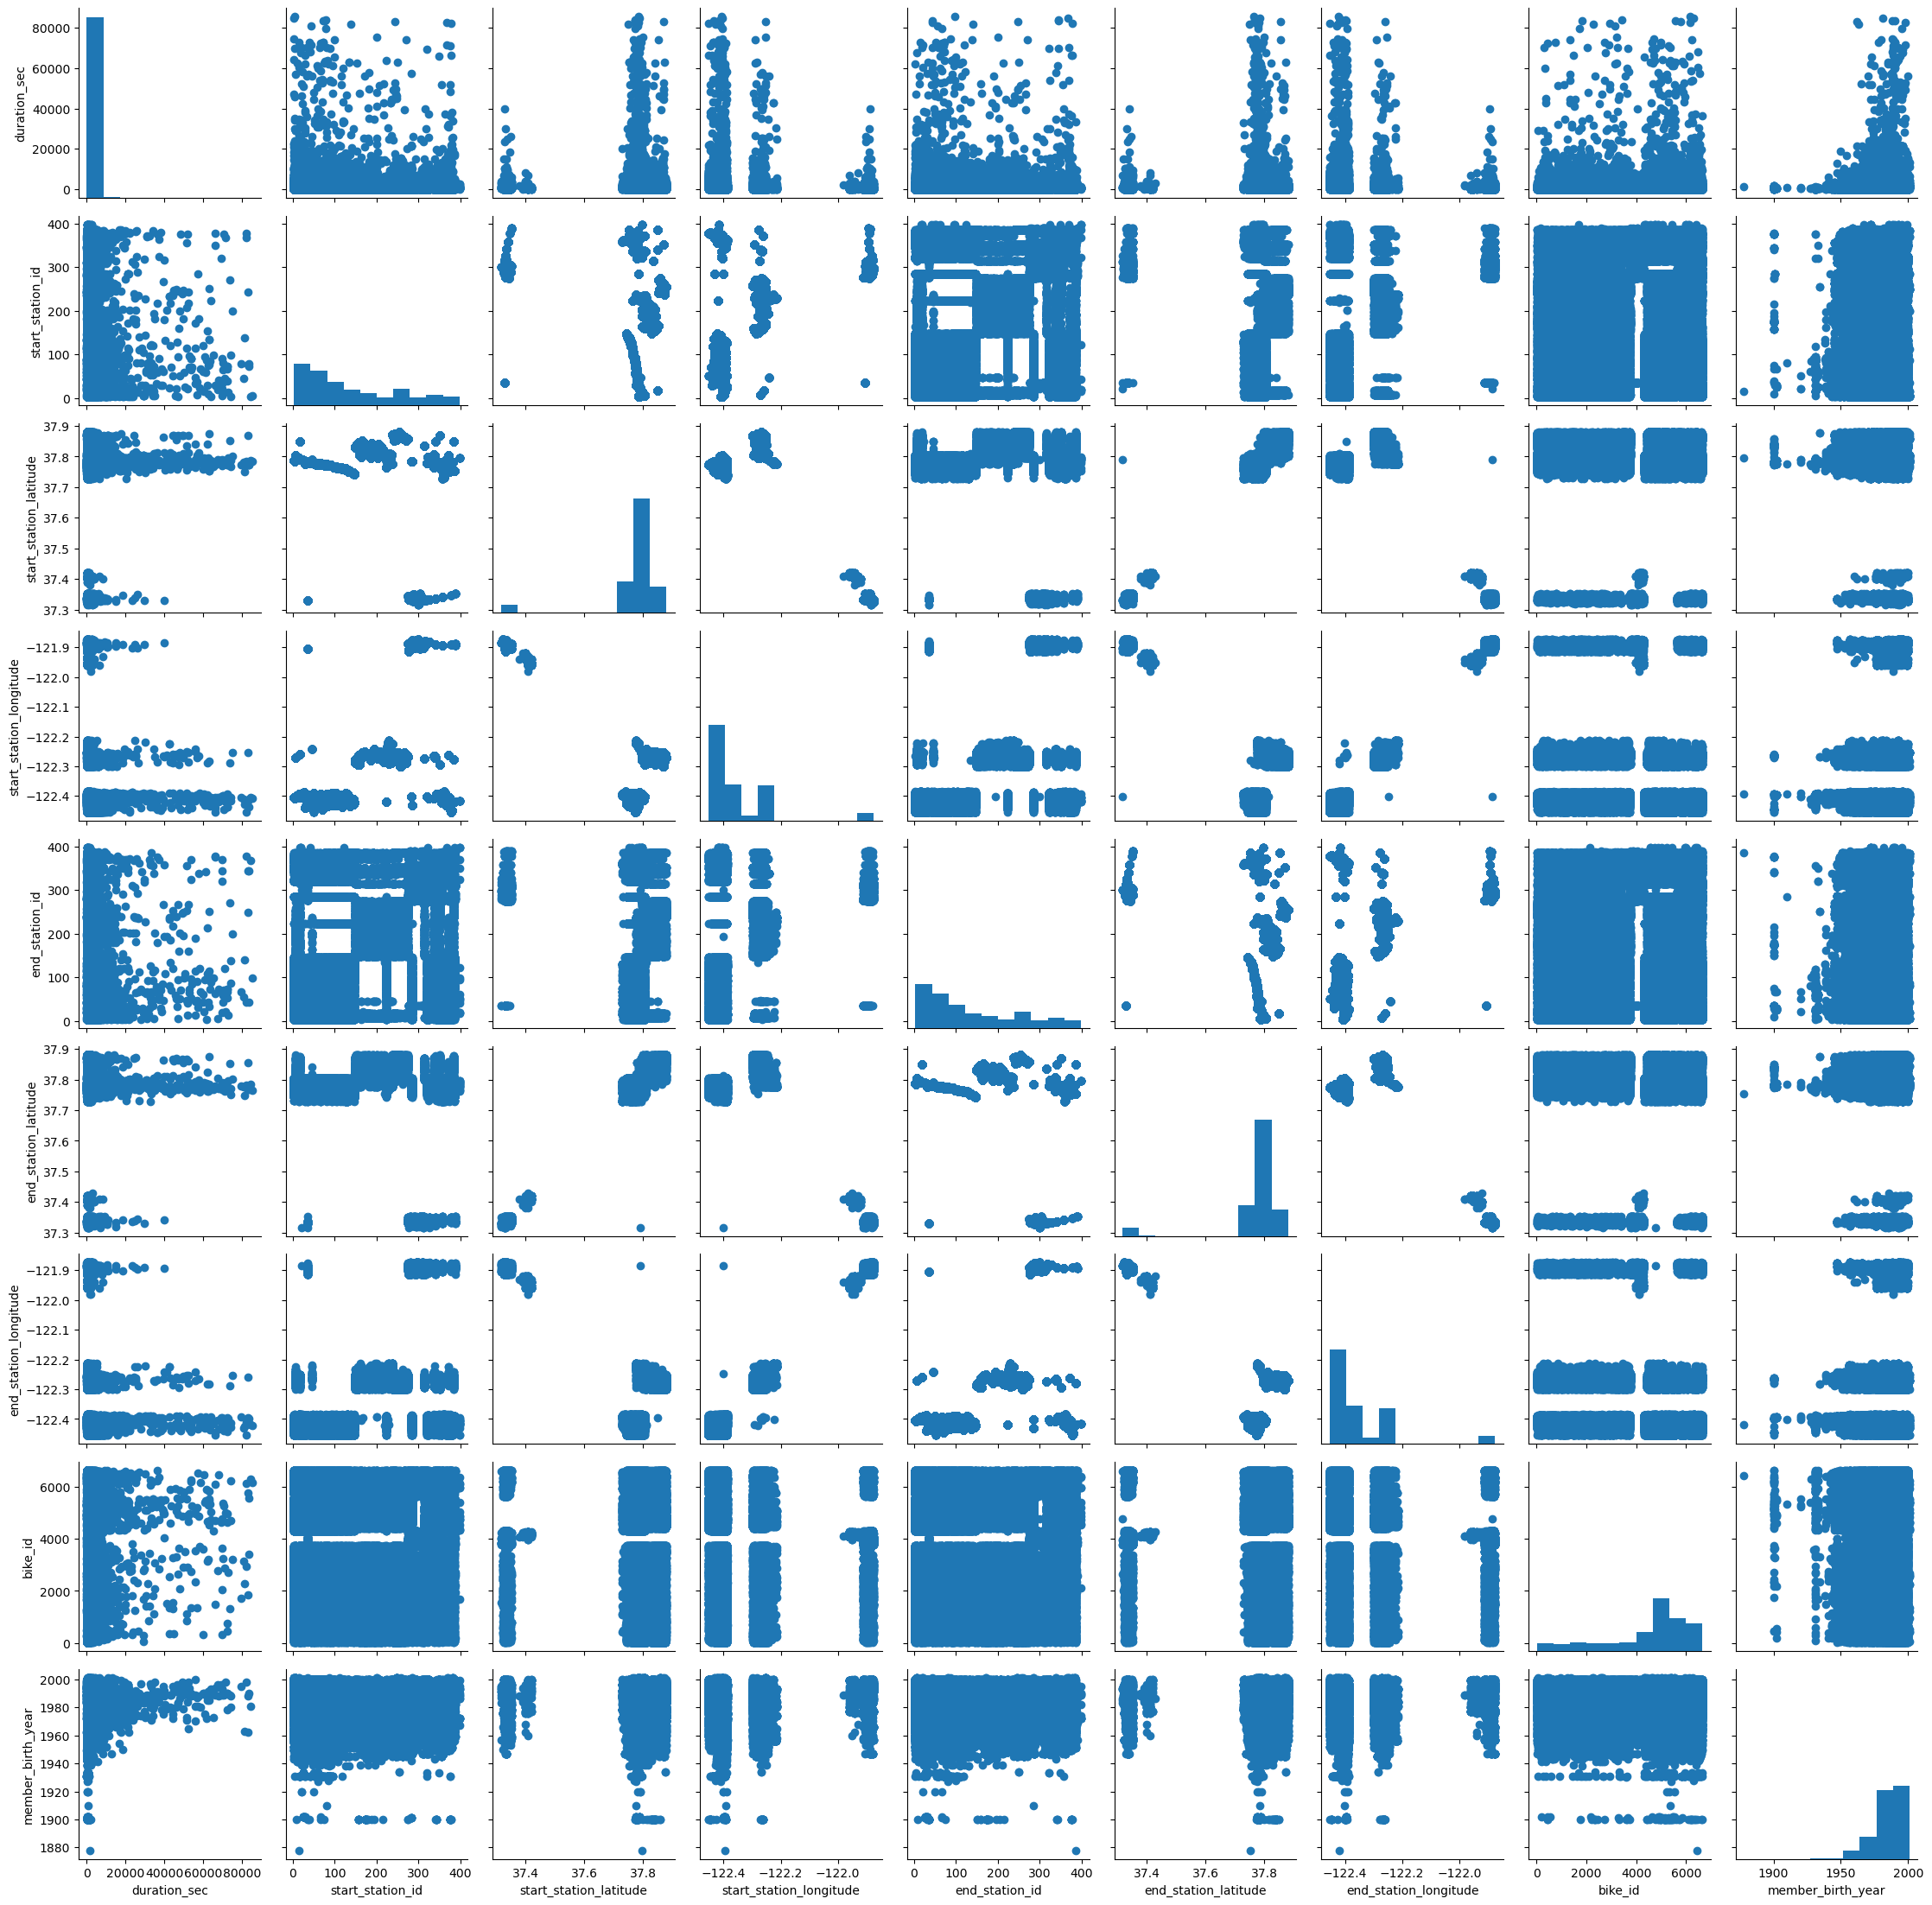

In [6]:
g = sb.PairGrid(data = df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [7]:
df.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [8]:
df['duration_min'] = df.duration_sec / 60

In [9]:
df.duration_min.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

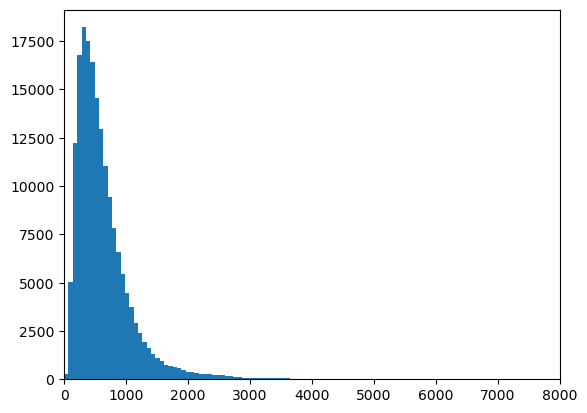

In [10]:
bins = np.arange(1,df.duration_sec.max()+100, 70)
plt.hist(x='duration_sec',data=df,bins=bins)
plt.xlim(0,8000);

Text(0, 0.5, 'Count')

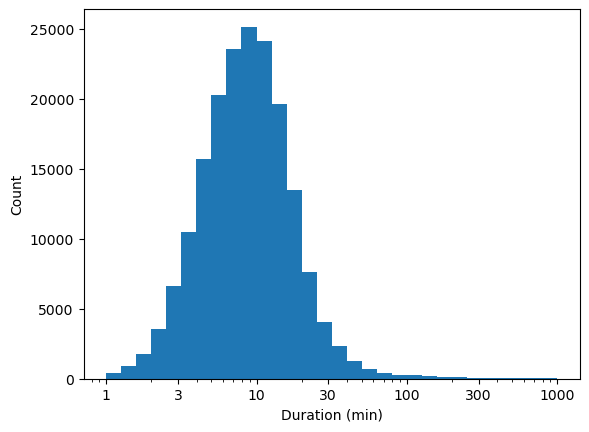

In [11]:
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(b) for b in ticks]
plt.hist(x='duration_min',data=df,bins=bins)
plt.xscale('log')
plt.xticks(ticks,labels);
plt.xlabel('Duration (min)')
plt.ylabel('Count')

In [12]:
df.start_time.dt.day.describe()

count    183412.000000
mean         15.298977
std           8.028187
min           1.000000
25%           8.000000
50%          15.000000
75%          22.000000
max          28.000000
Name: start_time, dtype: float64

In [13]:
df['age'] = 2019 - df.member_birth_year
df.age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

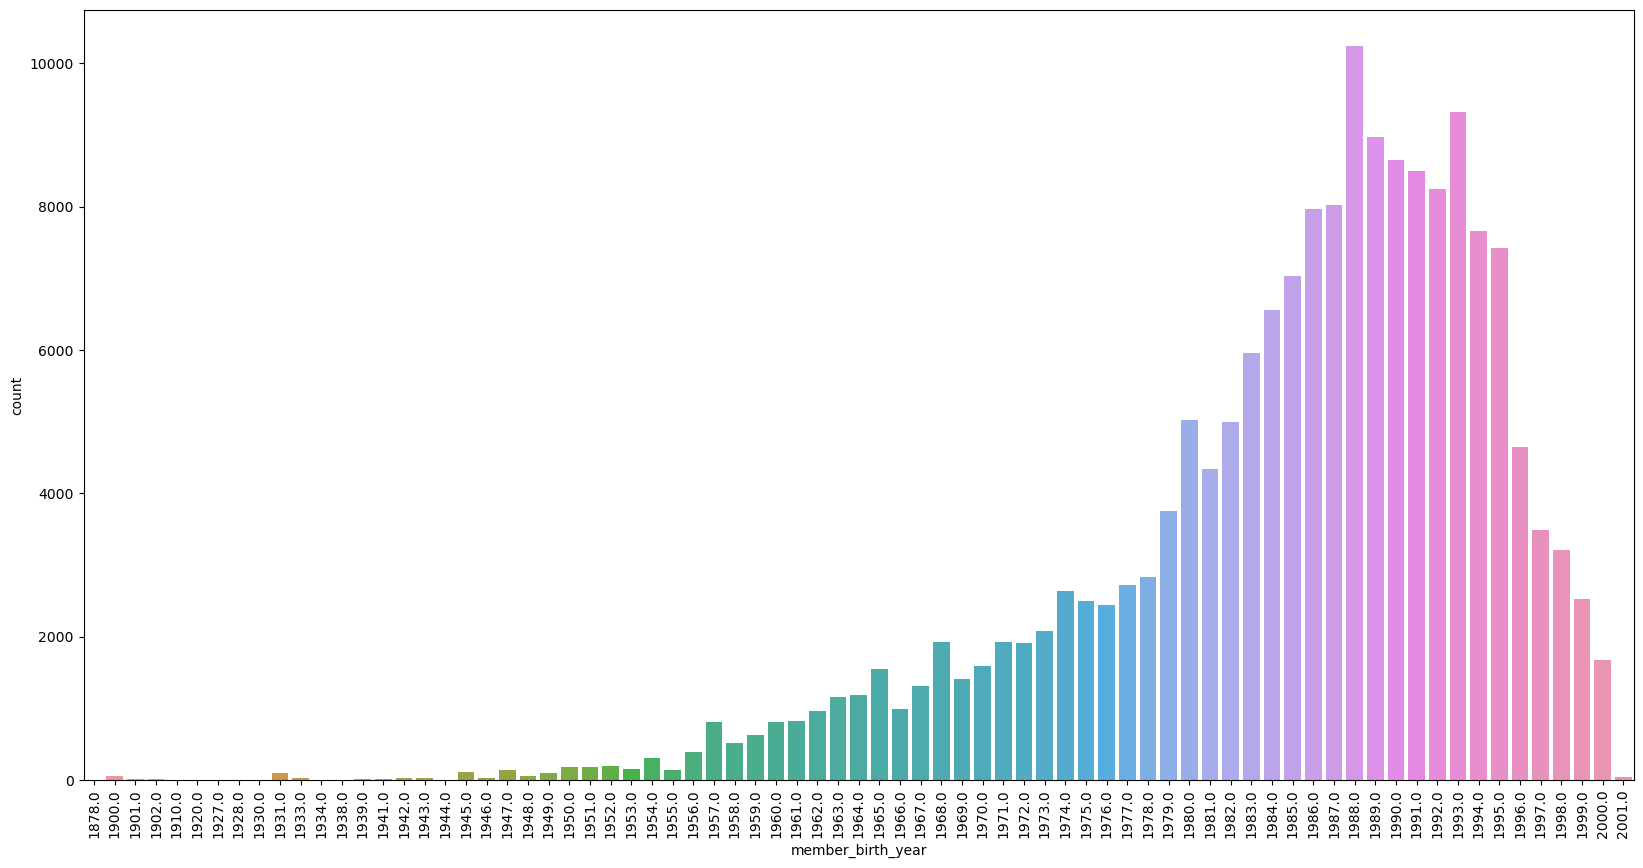

In [14]:
plt.figure(figsize=(20 , 10))
sb.countplot(data=df,x='member_birth_year')
plt.xticks(rotation = 90);

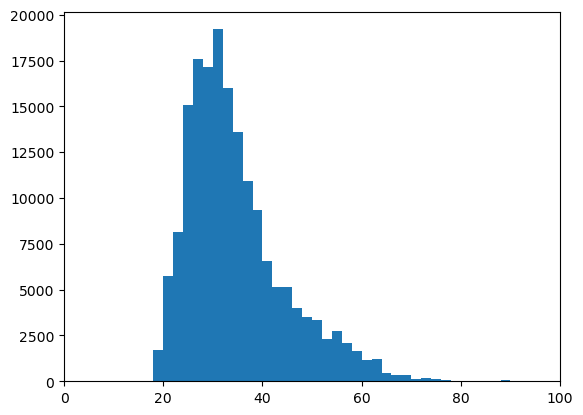

In [15]:
bins = np.arange(18,df.age.max()+2, 2)
plt.hist(x='age',data=df,bins=bins)
plt.xlim(0,100);

([<matplotlib.patches.Wedge at 0x7f1160249160>,
 [Text(0.36715847215620423, -1.0369159350323063, 'Subscriber'),
  Text(-0.36715839934389577, 1.0369159608141967, 'Customer')])

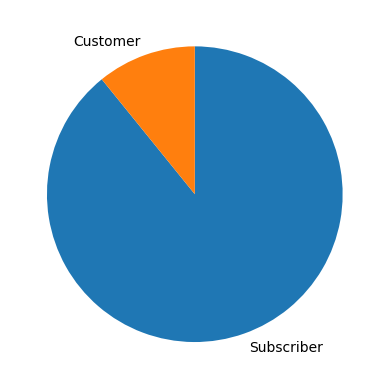

In [16]:
user_type_counts = df.user_type.value_counts()
plt.pie(user_type_counts,labels=user_type_counts.index,startangle = 90, counterclock = False)

<AxesSubplot:xlabel='member_gender', ylabel='count'>

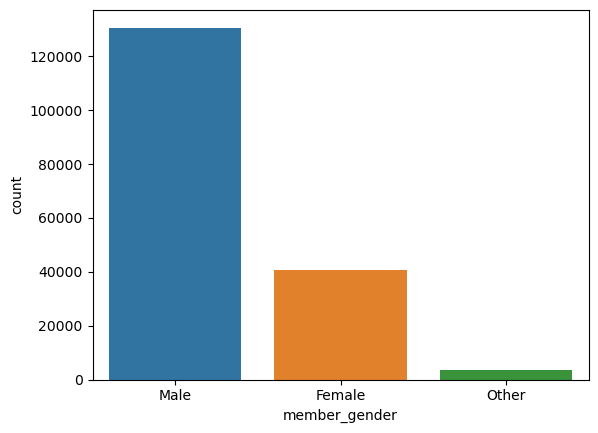

In [17]:
gender_order = df.member_gender.value_counts().index
sb.countplot(data=df,x='member_gender',order = gender_order)

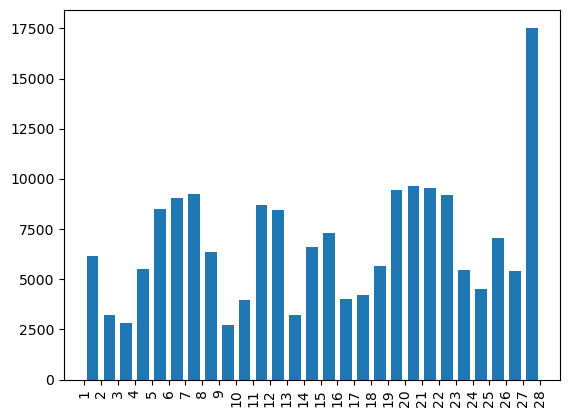

In [18]:
bin_edges = np.arange(1, 28+1, 1)
plt.hist(x=df.start_time.dt.day, bins = bin_edges, rwidth = 0.7)
plt.xticks(rotation=90)
plt.xticks(np.arange(1, 28+1, 1));

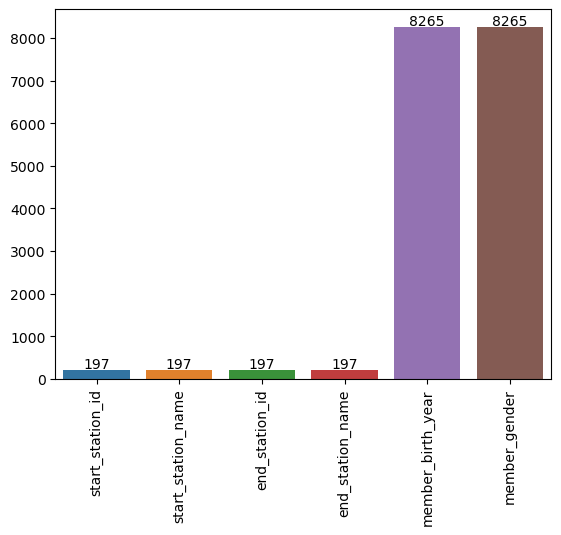

In [19]:
na_counts = df[['start_station_id','start_station_name','end_station_id','end_station_name','member_birth_year','member_gender']].isna().sum()
sb.barplot(x=na_counts.index.values, y=na_counts,order=na_counts.index)

plt.xticks(rotation=90) 

for i in range (na_counts.shape[0]):
    count = na_counts[i]

    plt.text(i, count+300, count, ha = 'center', va='top')

([<matplotlib.patches.Wedge at 0x7f11602ca370>,
 [Text(0.3222710840032673, -1.051732546047406, 'No'),
  Text(-0.32227108400326715, 1.051732546047406, 'Yes')])

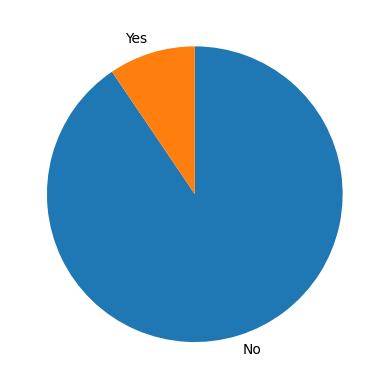

In [20]:
bike_share_counts = df.bike_share_for_all_trip.value_counts()
plt.pie(bike_share_counts,labels=bike_share_counts.index,startangle = 90, counterclock = False)

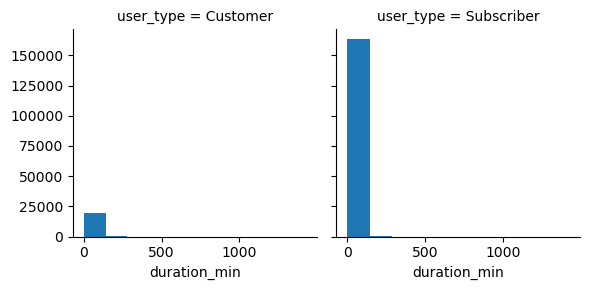

In [21]:
userclasses = pd.api.types.CategoricalDtype(ordered=True, categories=df.user_type.unique())
df.user_type = df.user_type.astype(userclasses);

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'user_type')
g.map(plt.hist, "duration_min")

In [22]:
bin_edges = np.arange(1, 28+1, 1)
bin_centers = bin_edges[:-1] + 1
bin_edges

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

ValueError: 'x' and 'y' must have the same size

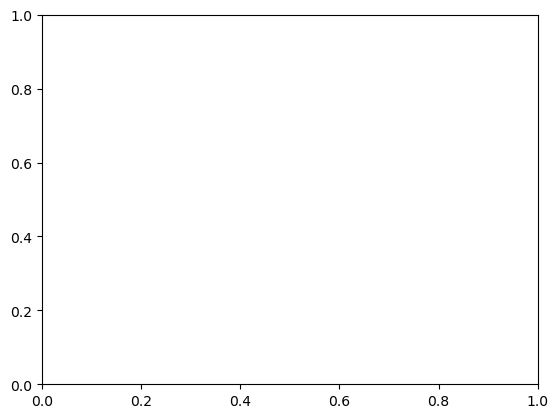

In [23]:
duration_mean = df.duration_min.groupby(df.age).mean()
duration_sum = df.duration_min.groupby(df.start_time.dt.day).sum()

plt.errorbar(x=bin_edges,y=duration_mean)

(-2.0, 30.0)

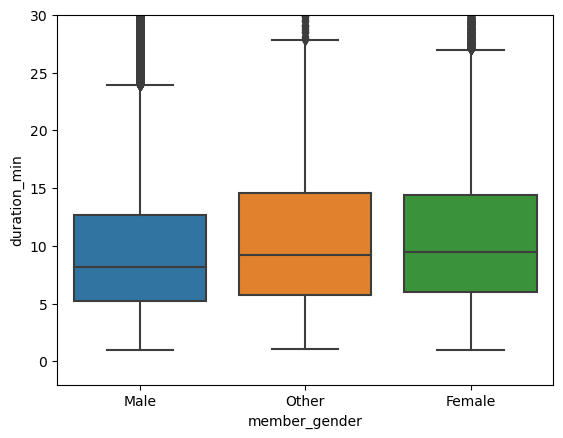

In [24]:
sb.boxplot(x=df.member_gender,y=df.duration_min)
plt.ylim([-2,30])

(-40.0, 200.0)

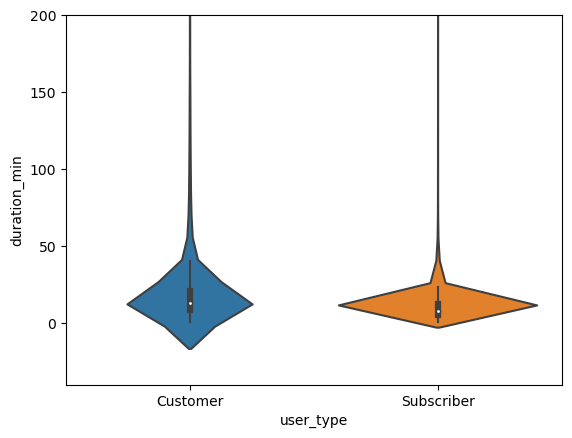

In [25]:
sb.violinplot(x=df.user_type,y=df.duration_min)
plt.ylim(-40,200)

<AxesSubplot:xlabel='bike_share_for_all_trip', ylabel='count'>

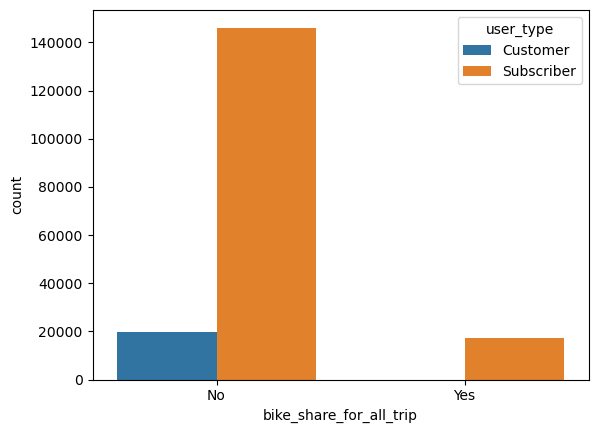

In [26]:
sb.countplot(data=df, x='bike_share_for_all_trip', hue='user_type') 

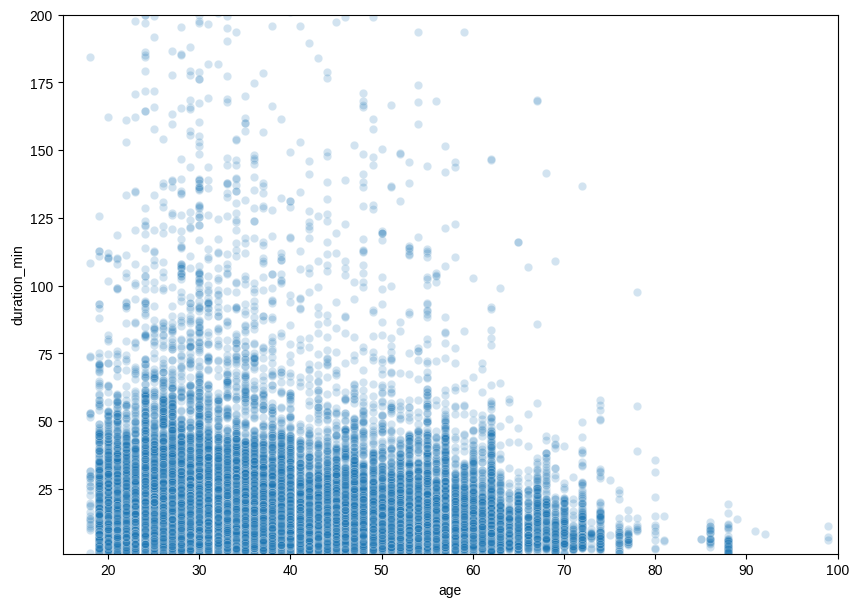

In [27]:
plt.figure(figsize=[10,7])
sb.scatterplot(data=df,x='age',y='duration_min',alpha=0.2)
plt.axis([-5, 115, 1, 200])
plt.xlim(15, 100)
plt.style.use('seaborn')

(0.0, 40000.0)

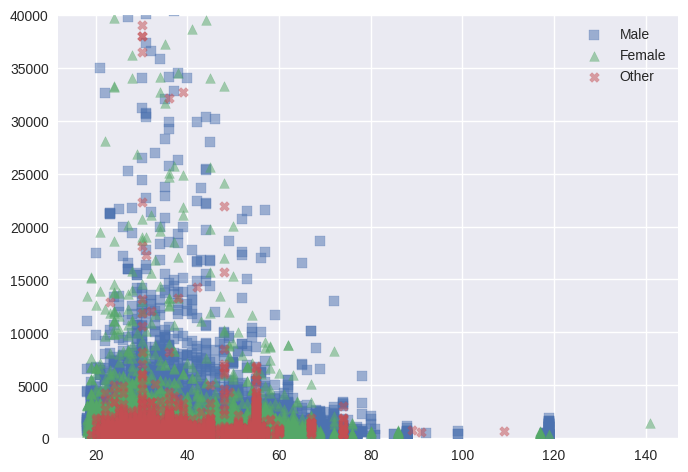

In [28]:
gender_markers = [['Male','s'],
                  ['Female','^'],
                  ['Other','X']]
for gender, marker in gender_markers:
    df_gender = df[df.member_gender== gender]
    plt.scatter(data=df_gender,x='age',y='duration_sec', marker=marker, alpha=0.5)
plt.legend(['Male','Female','Other'])
plt.ylim(0,40000)

<AxesSubplot:xlabel='day', ylabel='count'>

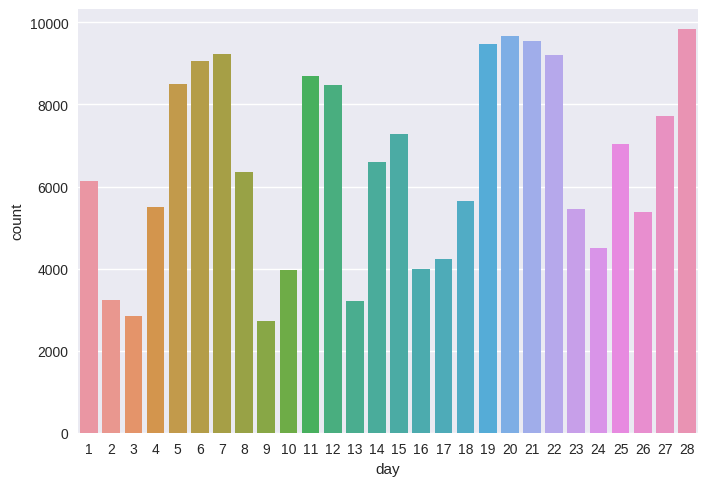

In [29]:
df['day'] = df.start_time.dt.day 
day_count = df.groupby('day')['duration_min']
sb.countplot(data=df,x='day')